In [108]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift
from scipy.spatial.distance import cdist
%matplotlib inline

In [14]:
with open("checkins.dat", "r") as in_file, open("checkins.csv", "w") as out_file:
    lines = in_file.readlines()
    header = ",".join(map(lambda s: s.strip(), lines[0].split("|")))
    out_file.write(header + '\n')
    for idx in range(2, len(lines)):
        get_parts = lambda: map(lambda s: s.strip(), lines[idx].split('|'))
        if all(len(s) > 0 for s in get_parts()):
            line = ",".join(get_parts())
            out_file.write(line + '\n')

In [21]:
df = pd.read_csv("checkins.csv")

/Users/astepanov/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
X = df[['latitude', 'longitude']].values[:100000]

In [43]:
X.shape

(100000, 2)

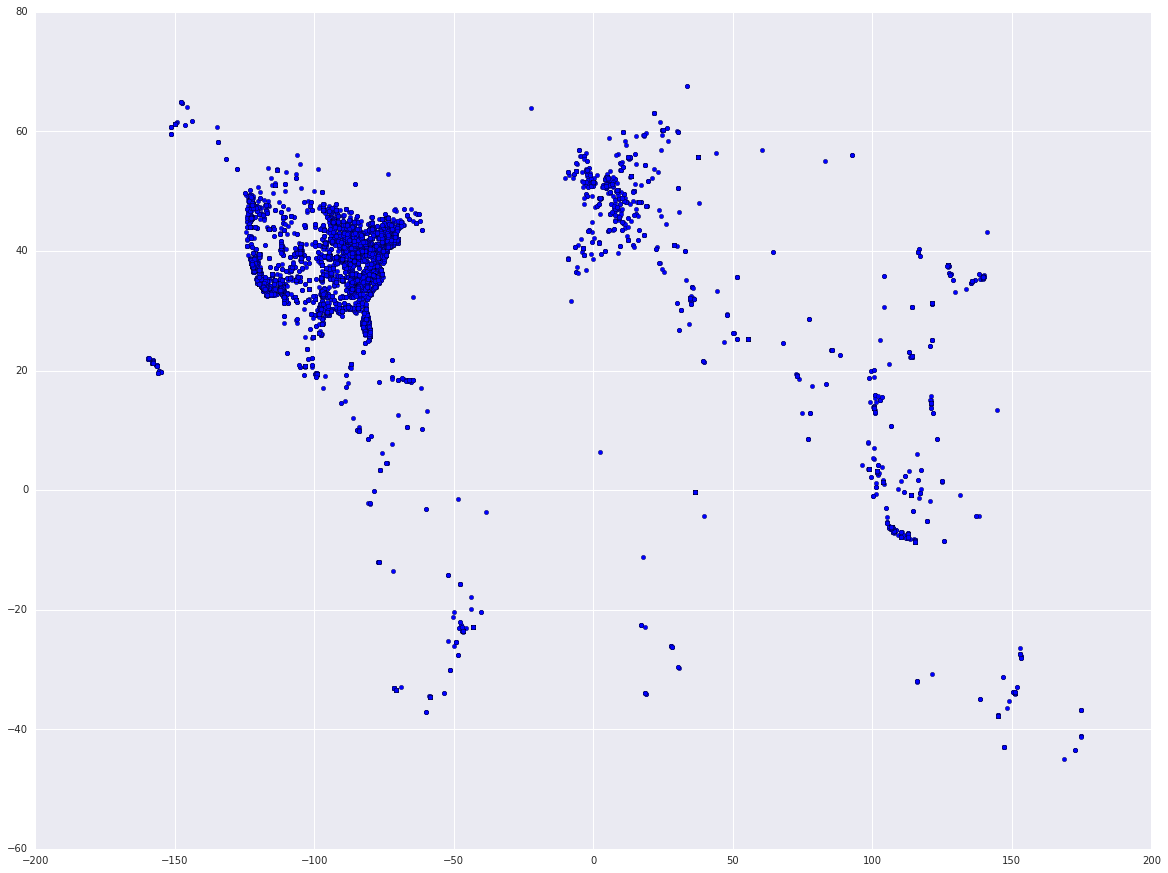

In [101]:
plt.figure(figsize=(20, 15))
plt.scatter(X.T[1], X.T[0])
plt.show()

In [48]:
mean_shift = MeanShift(bandwidth=0.1, n_jobs=4)

In [49]:
y = mean_shift.fit_predict(X)

In [90]:
clusters = mean_shift.cluster_centers_

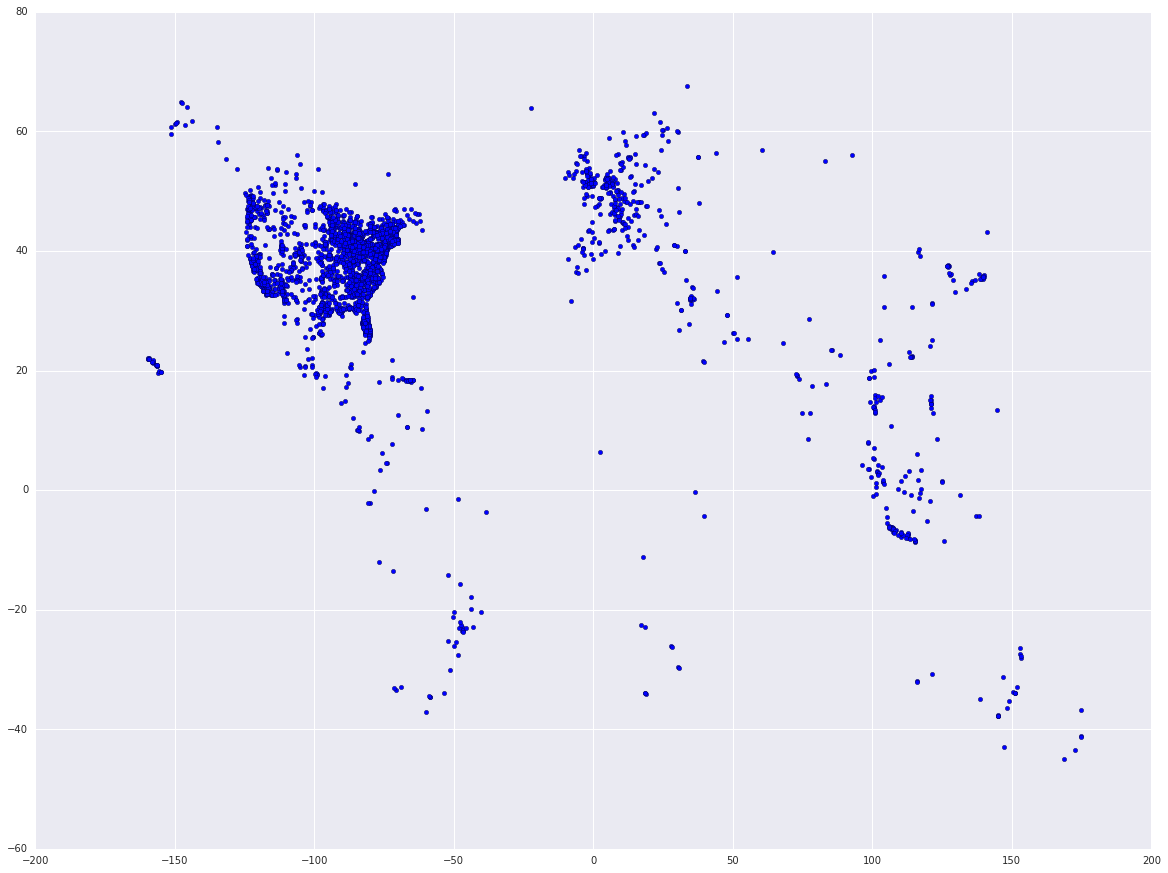

In [102]:
plt.figure(figsize=(20, 15))
plt.scatter(clusters.T[1], clusters.T[0])
plt.show()

In [106]:
hqs = np.array([[33.751277, -118.188740],
[25.867736, -80.324116],
[51.503016, -0.075479],
[52.378894, 4.885084],
[39.366487, 117.036146],
[-33.868457, 151.205134]])

In [117]:
distances = np.min(cdist(hqs, clusters, 'euclidean'), axis=0)

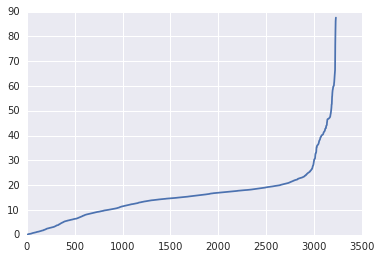

In [134]:
plt.plot(np.sort(distances))

In [123]:
best_cluster_no = np.argmin(distances)

In [130]:
best_cluster = clusters[best_cluster_no]

In [132]:
with open("answer.txt", "w") as ans_file:
    ans_file.write("{lat} {long}".format(lat=best_cluster[0], long=best_cluster[1]) + '\n')